In [305]:
#Final Project - Predicting the Average Voter Score of Future Movies

In [ ]:
#DATASET SETUP

In [3]:
#Imports 
import pandas as pd
import requests
import json
from pprint import pprint
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [5]:
#Print the original dataset pulled from the Movie Database API
a = pd.read_csv("a.csv")
a.columns
df = a[['id','title','popularity','vote_count','vote_average','original_language','release_date']]
df

,id,title,popularity,vote_count,vote_average,original_language,release_date
0,531219,Roald Dahl's The Witches,1497.123,698,6.9,en,2020-10-26
1,718444,Rogue,562.083,354,5.8,en,2020-08-20
2,594718,Sputnik,475.982,50,6.4,ru,2020-09-10
3,531499,The Tax Collector,444.615,179,6.0,en,2020-08-07
4,425001,The War with Grandpa,347.616,121,6.0,en,2020-08-27
...,...,...,...,...,...,...,...
195,741032,Danyka,6.292,0,0.0,en,2020-11-26
196,653756,The Mole Agent,4.199,0,0.0,es,2020-12-11
197,660330,Night Shift,5.035,34,6.3,fr,2020-05-21
198,745589,Villa caprice,4.251,0,0.0,fr,2020-11-25


In [7]:
#Seperate the dataset into movies in ciruclation and anticipated movies
movies_to_predict = df[(df['vote_count'] == 0)]
train_model_movies = df[(df['vote_count'] > 0)]
movies_to_predict.to_csv("b_movies_to_predict.csv")
train_model_movies.to_csv("b_train_model_movies.csv")

In [ ]:
#MODELING TIME

In [147]:
#Imoports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

#Look at the shape of the dataframe
train_model_movies.shape

(98, 12)

In [148]:
#making the prediction factors numerical
movies_to_predict
movies_to_predict['release_month']= pd.DatetimeIndex(movies_to_predict['release_date']).month
movies_to_predict['release_day']= pd.DatetimeIndex(movies_to_predict['release_date']).day
movies_to_predict['release_year']= pd.DatetimeIndex(movies_to_predict['release_date']).year
train_model_movies['en = lang'] = np.where((train_model_movies['original_language']>='en'), 1, 0)
train_model_movies.to_csv("a_prediction_analysis.csv")
train_model_movies

<ipython-input-148-79313c67d520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_to_predict['release_month']= pd.DatetimeIndex(movies_to_predict['release_date']).month
<ipython-input-148-79313c67d520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_to_predict['release_day']= pd.DatetimeIndex(movies_to_predict['release_date']).day
<ipython-input-148-79313c67d520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,id,title,popularity,vote_count,vote_average,original_language,release_date,avg_vote_6+,en = lang,release_month,release_day,release_year
0,531219,Roald Dahl's The Witches,1497.123,698,6.9,en,2020-10-26,1,1,10,26,2020
1,718444,Rogue,562.083,354,5.8,en,2020-08-20,0,1,8,20,2020
2,594718,Sputnik,475.982,50,6.4,ru,2020-09-10,1,1,9,10,2020
3,531499,The Tax Collector,444.615,179,6.0,en,2020-08-07,1,1,8,7,2020
4,425001,The War with Grandpa,347.616,121,6.0,en,2020-08-27,1,1,8,27,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
188,424201,Burden,6.429,13,6.0,en,2020-02-28,1,1,2,28,2020
190,744738,Dune Drifter,5.837,4,5.4,en,2020-10-24,0,1,10,24,2020
193,613319,Selfie,4.927,48,5.6,fr,2020-01-15,0,1,1,15,2020
197,660330,Night Shift,5.035,34,6.3,fr,2020-05-21,1,1,5,21,2020


In [41]:
#input variables are: popularity, original language (en: 1; non-en: 0), release day, month, year
#ouput variable: is this true? "yes" - vote_average is > 5.0 for future movies 

In [9]:
#Checking the spread of vote average
train_model_movies['vote_average'].unique()

array([6.9, 5.8, 6.4, 6. , 6.6, 5.5, 6.3, 7.1, 6.7, 5.7, 6.8, 7.9, 6.5,
       7.5, 7.8, 4.4, 4.3, 6.1, 5.9, 7.2, 7. , 6.2, 4.7, 8.5, 8.1, 4.9,
       8. , 7.6, 1. , 5.1, 8.7, 7.7, 4.5, 3.8, 5.6, 7.4, 5.4])

In [15]:
#making the prediction factors numerical
train_model_movies['release_month']= pd.DatetimeIndex(train_model_movies['release_date']).month
train_model_movies['release_day']= pd.DatetimeIndex(train_model_movies['release_date']).day
train_model_movies['release_year']= pd.DatetimeIndex(train_model_movies['release_date']).year
train_model_movies.to_csv("a_training_analysis.csv")

<ipython-input-15-32cae2ebee1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_model_movies['release_month']= pd.DatetimeIndex(train_model_movies['release_date']).month
<ipython-input-15-32cae2ebee1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_model_movies['release_day']= pd.DatetimeIndex(train_model_movies['release_date']).day
<ipython-input-15-32cae2ebee1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [18]:
train_model_movies_subset = train_model_movies[(train_model_movies['id'] < 600000)]
train_model_movies_subset.head(3)

,id,title,popularity,vote_count,vote_average,original_language,release_date,avg_vote_6+,en = lang,release_month,release_day,release_year
0,531219,Roald Dahl's The Witches,1497.123,698,6.9,en,2020-10-26,1,1,10,26,2020
2,594718,Sputnik,475.982,50,6.4,ru,2020-09-10,1,1,9,10,2020
3,531499,The Tax Collector,444.615,179,6.0,en,2020-08-07,1,1,8,7,2020


In [26]:
train_model_movies_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 68 non-null     int64  
 1   title              68 non-null     object 
 2   popularity         68 non-null     float64
 3   vote_count         68 non-null     int64  
 4   vote_average       68 non-null     float64
 5   original_language  68 non-null     object 
 6   release_date       68 non-null     object 
 7   avg_vote_6+        68 non-null     int64  
 8   en = lang          68 non-null     int64  
 9   release_month      68 non-null     int64  
 10  release_day        68 non-null     int64  
 11  release_year       68 non-null     int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 6.9+ KB


In [111]:
#defining the X and y of the model for training purposes
X = train_model_movies_subset[['popularity','en = lang','release_month','release_day','release_year']]
y = train_model_movies_subset[['avg_vote_6+']]

In [112]:
#Split the dataset in to test and train using sklearn before building the SVM 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [113]:
#fit the model 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [114]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
y_predict = svclassifier.predict(X_test)

In [149]:
#ANALYSIS

In [115]:
#print the accuracy of the model 
print('Test Acc: %.3f' % model.score(X_test, y_test)) 

Test Acc: 0.765


In [116]:
#calculated the classified report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[ 0  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      1.00      0.87        13

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [338]:
#With the classification report we confirm that the model was able to identify movies with a 6+ average score 76% of the time.
#With an F1 score of 0.87, we confirm that our model has a high level of accuracy at predicting a positive outcome

In [297]:
#refrence: https://intellipaat.com/blog/tutorial/machine-learning-tutorial/svm-algorithm-in-python/

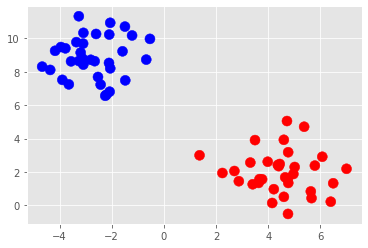

In [117]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=68, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [118]:
#compare the actual vs the predicted values for the test data
y_test.head(3)

,avg_vote_6+
17,1
183,1
84,1


In [119]:
compare = y_test.rename(columns={'avg_vote_6+': 'actual_y'}, index={'ONE': 'one'})
compare['predicted_y'] = y_predict
compare.head(9)

,actual_y,predicted_y
17,1,1
183,1,1
84,1,1
37,1,1
15,1,1
9,1,1
78,0,1
12,1,1
188,1,1


In [ ]:
#PREDICTION TIME

In [120]:
movies_to_predict.head(3)
movies_to_predict['release_month']= pd.DatetimeIndex(movies_to_predict['release_date']).month
movies_to_predict['release_day']= pd.DatetimeIndex(movies_to_predict['release_date']).day
movies_to_predict['release_year']= pd.DatetimeIndex(movies_to_predict['release_date']).year
movies_to_predict['en = lang'] = np.where((movies_to_predict['original_language']>='en'), 1, 0)

movies_to_predict.head(3)
movies_to_predict_subset = movies_to_predict[(movies_to_predict['id'] < 600000)]
movies_to_predict_subset['predict:avg_vote_6+'] = ''
movies_to_predict_subset.head(3)

<ipython-input-120-e35c43fde5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_to_predict['release_month']= pd.DatetimeIndex(movies_to_predict['release_date']).month
<ipython-input-120-e35c43fde5a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_to_predict['release_day']= pd.DatetimeIndex(movies_to_predict['release_date']).day
<ipython-input-120-e35c43fde5a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,id,title,popularity,vote_count,vote_average,original_language,release_date,release_month,release_day,release_year,en = lang,predict:avg_vote_6+
6,591629,Lady Driver,267.579,0,0.0,en,2020-12-03,12,3,2020,1,
26,458576,Monster Hunter,53.043,0,0.0,en,2020-12-03,12,3,2020,1,
31,521007,Superintelligence,33.184,0,0.0,en,2020-11-26,11,26,2020,1,


In [121]:
X_p = movies_to_predict_subset[['popularity','en = lang','release_month','release_day','release_year']]
y_p = [1,0]
print("features:", X.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [133]:
y_pred = model.predict(X_p)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [136]:
#Print the y value, ie the prediction determining if a soon to be released movie will have an average vote of 6.0+
X_p['Output'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1]
X_p

<ipython-input-136-5f89dad4eeab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_p['Output'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1]


,popularity,en = lang,release_month,release_day,release_year,Output
6,267.579,1,12,3,2020,1
26,53.043,1,12,3,2020,1
31,33.184,1,11,26,2020,1
49,24.098,1,11,18,2020,1
58,15.446,1,11,20,2020,1
63,16.473,1,12,11,2020,1
88,10.972,0,11,13,2020,1
89,15.249,1,11,18,2020,1
92,9.298,1,11,28,2020,1
94,14.826,1,11,27,2020,1


In [144]:
predicted_movies = movies_to_predict_subset[['id','title']]

In [150]:
#Print a dataframe that shows the prediction alongside the title names of future movies
predict_df = pd.concat([predicted_movies, X_p], axis=1)
predict_df

,id,title,popularity,en = lang,release_month,release_day,release_year,Output
6,591629,Lady Driver,267.579,1,12,3,2020,1
26,458576,Monster Hunter,53.043,1,12,3,2020,1
31,521007,Superintelligence,33.184,1,11,26,2020,1
49,314514,El Viaje de Ana,24.098,1,11,18,2020,1
58,502033,Sound of Metal,15.446,1,11,20,2020,1
63,426793,Parallel,16.473,1,12,11,2020,1
88,589456,Find Your Voice,10.972,0,11,13,2020,1
89,592777,Should the Wind Drop,15.249,1,11,18,2020,1
92,514466,Supercool,9.298,1,11,28,2020,1
94,353047,Zappa,14.826,1,11,27,2020,1
